In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing



In [ ]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [ ]:
shopping_df = pd.read_excel("Project1_Data.xlsx")

In [ ]:
shopping_df

,userid,education,region,hhsz,age,income,child,race,connection,country,zipcode,money,site1,site2,site3,site4,site5
0,14840503,99,4,5,6,2,1,1,1,0,94954,657.93,victoriassecret.com,llbean.com,NaN,NaN,NaN
1,12890751,4,2,2,8,4,1,1,1,0,46038,178.80,landsend.com,gap.com,NaN,NaN,NaN
2,13129562,4,2,4,8,5,1,1,1,0,64504,483.44,oldnavy.com,jcpenney.com,kohls.com,NaN,NaN
3,12910664,99,3,4,4,2,1,1,1,0,31554,148.85,victoriassecret.com,ae.com,NaN,NaN,NaN
4,13601071,99,3,3,7,4,0,1,1,0,40033,801.40,victoriassecret.com,oldnavy.com,jcpenney.com,NaN,NaN
5,15314597,99,1,1,7,5,0,2,1,0,19145,2213.33,jcpenney.com,landsend.com,NaN,NaN,NaN
6,15537454,99,3,2,9,7,1,1,1,0,26037,354.30,landsend.com,llbean.com,NaN,NaN,NaN
7,13020319,99,2,4,9,6,1,1,1,0,60143,542.21,jcpenney.com,womanwithin.com,kohls.com,blair.com,NaN
8,14586021,99,1,3,10,5,1,1,0,0,16130,393.76,jcpenney.com,landsend.com,NaN,NaN,NaN
9,15653569,99,2,4,4,7,1,1,1,0,60102,308.47,victoriassecret.com,gap.com,NaN,NaN,NaN


In [ ]:
shopping_df_drop=shopping_df.drop(['site1', 'site2', 'site3', 'site4', 'site5'], axis = 1)
shopping_df_drop

,userid,education,region,hhsz,age,income,child,race,connection,country,zipcode,money
0,14840503,99,4,5,6,2,1,1,1,0,94954,657.93
1,12890751,4,2,2,8,4,1,1,1,0,46038,178.80
2,13129562,4,2,4,8,5,1,1,1,0,64504,483.44
3,12910664,99,3,4,4,2,1,1,1,0,31554,148.85
4,13601071,99,3,3,7,4,0,1,1,0,40033,801.40
5,15314597,99,1,1,7,5,0,2,1,0,19145,2213.33
6,15537454,99,3,2,9,7,1,1,1,0,26037,354.30
7,13020319,99,2,4,9,6,1,1,1,0,60143,542.21
8,14586021,99,1,3,10,5,1,1,0,0,16130,393.76
9,15653569,99,2,4,4,7,1,1,1,0,60102,308.47


In [ ]:
shopping_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 12 columns):
userid        2186 non-null int64
education     2186 non-null int64
region        2186 non-null int64
hhsz          2186 non-null int64
age           2186 non-null int64
income        2186 non-null int64
child         2186 non-null int64
race          2186 non-null int64
connection    2186 non-null int64
country       2186 non-null int64
zipcode       2186 non-null int64
money         2186 non-null float64
dtypes: float64(1), int64(11)
memory usage: 205.0 KB


In [ ]:
shopping_df_drop.set_index('userid', inplace=True)
shopping_df_drop = shopping_df_drop.apply(lambda x: x.astype('float64'))


In [ ]:
shopping_df_drop_norm = shopping_df_drop.apply(preprocessing.scale, axis=0)
shopping_df_drop_norm

,education,region,hhsz,age,income,child,race,connection,country,zipcode,money
userid,,,,,,,,,,,
14840503,0.583954,1.639085,1.364171,-0.290355,-1.433249,0.600954,-0.149263,0.281968,-0.392646,1.834633,0.100491
12890751,-1.681754,-0.254199,-0.943343,0.353374,-0.381879,0.600954,-0.149263,0.281968,-0.392646,0.152595,-0.522412
13129562,-1.681754,-0.254199,0.594999,0.353374,0.143806,0.600954,-0.149263,0.281968,-0.392646,0.787572,-0.126359
12910664,0.583954,0.692443,0.594999,-0.934084,-1.433249,0.600954,-0.149263,0.281968,-0.392646,-0.345455,-0.561349
13601071,0.583954,0.692443,-0.174172,0.031509,-0.381879,-1.664021,-0.149263,0.281968,-0.392646,-0.053894,0.287011
15314597,0.583954,-1.200841,-1.712514,0.031509,0.143806,-1.664021,3.980967,0.281968,-0.392646,-0.772154,2.122619
15537454,0.583954,0.692443,-0.943343,0.675238,1.195176,0.600954,-0.149263,0.281968,-0.392646,-0.535164,-0.294250
13020319,0.583954,-0.254199,0.594999,0.675238,0.669491,0.600954,-0.149263,0.281968,-0.392646,0.637613,-0.049954
14586021,0.583954,-1.200841,-0.174172,0.997103,0.143806,0.600954,-0.149263,-3.546497,-0.392646,-0.875828,-0.242949


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(shopping_df_drop_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=shopping_df_drop_norm.index)

In [ ]:
memb

userid
14840503    0
12890751    0
13129562    0
12910664    0
13601071    2
15314597    2
15537454    0
13020319    0
14586021    3
15653569    0
12103861    2
15318418    1
15572150    2
13971801    0
15480135    1
14423054    0
14705577    0
14602489    0
11591425    2
15528325    2
12930062    3
13421681    3
15420133    0
13015024    0
15484146    0
13634033    0
13043251    0
14850945    0
15330930    1
14256375    0
           ..
12994940    0
13045225    0
13931712    1
15408826    2
14422626    1
13531791    3
10577796    2
13130291    0
15462253    2
12638199    1
15050488    0
14637042    2
15078093    1
14555849    1
14911155    1
14132780    1
14585021    2
14604120    3
14658239    0
14226830    2
11915166    0
15427209    1
14786959    0
14369262    2
13791014    1
14606550    2
14590791    0
14917811    3
14656919    2
14103254    2
Length: 2186, dtype: int32

In [ ]:
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(map(str,(item.index))))

0 :  14840503, 12890751, 13129562, 12910664, 15537454, 13020319, 15653569, 13971801, 14423054, 14705577, 14602489, 15420133, 13015024, 15484146, 13634033, 13043251, 14850945, 14256375, 15531786, 11561629, 14894229, 14598179, 14032241, 14947938, 12484409, 14264581, 15427838, 14574677, 15496226, 14607445, 13999721, 14540929, 15476910, 15377387, 15202147, 15490209, 14612158, 13646576, 15396901, 13751062, 15284863, 12733964, 15410726, 15197354, 14814447, 11483061, 14147561, 15467014, 14831712, 14224159, 15554692, 13573961, 12831334, 14170741, 12478626, 14386209, 15489395, 14541953, 12514957, 14787844, 15653081, 15220711, 14649227, 15359933, 15395926, 13055226, 14473709, 14516025, 12691373, 13655356, 15519904, 12633515, 12639378, 14879496, 15282727, 14423605, 10430323, 13740922, 14577841, 12991239, 10350610, 14590199, 13771032, 14536954, 12501531, 15697102, 13487491, 14233829, 15619981, 12970865, 10298714, 13031753, 12647269, 14235954, 14563710, 13499074, 15563518, 13636255, 14865279, 14564

   education  region   hhsz    age  income  child   race  connection  country  \
0     -0.030   0.566  0.310 -0.037   0.065  0.594 -0.020       0.282   -0.004   
1      0.012  -1.191  0.387  0.111   0.215  0.559 -0.039       0.282   -0.062   
2      0.067  -0.026 -0.945 -0.076  -0.231 -1.664  0.092       0.282   -0.044   
3     -0.060   0.104 -0.126  0.137  -0.326 -0.159 -0.047      -3.546    0.356   

   zipcode  money  
0    0.504 -0.027  
1   -1.068  0.192  
2    0.003 -0.078  
3    0.039 -0.165  


(-0.5, 10.5)

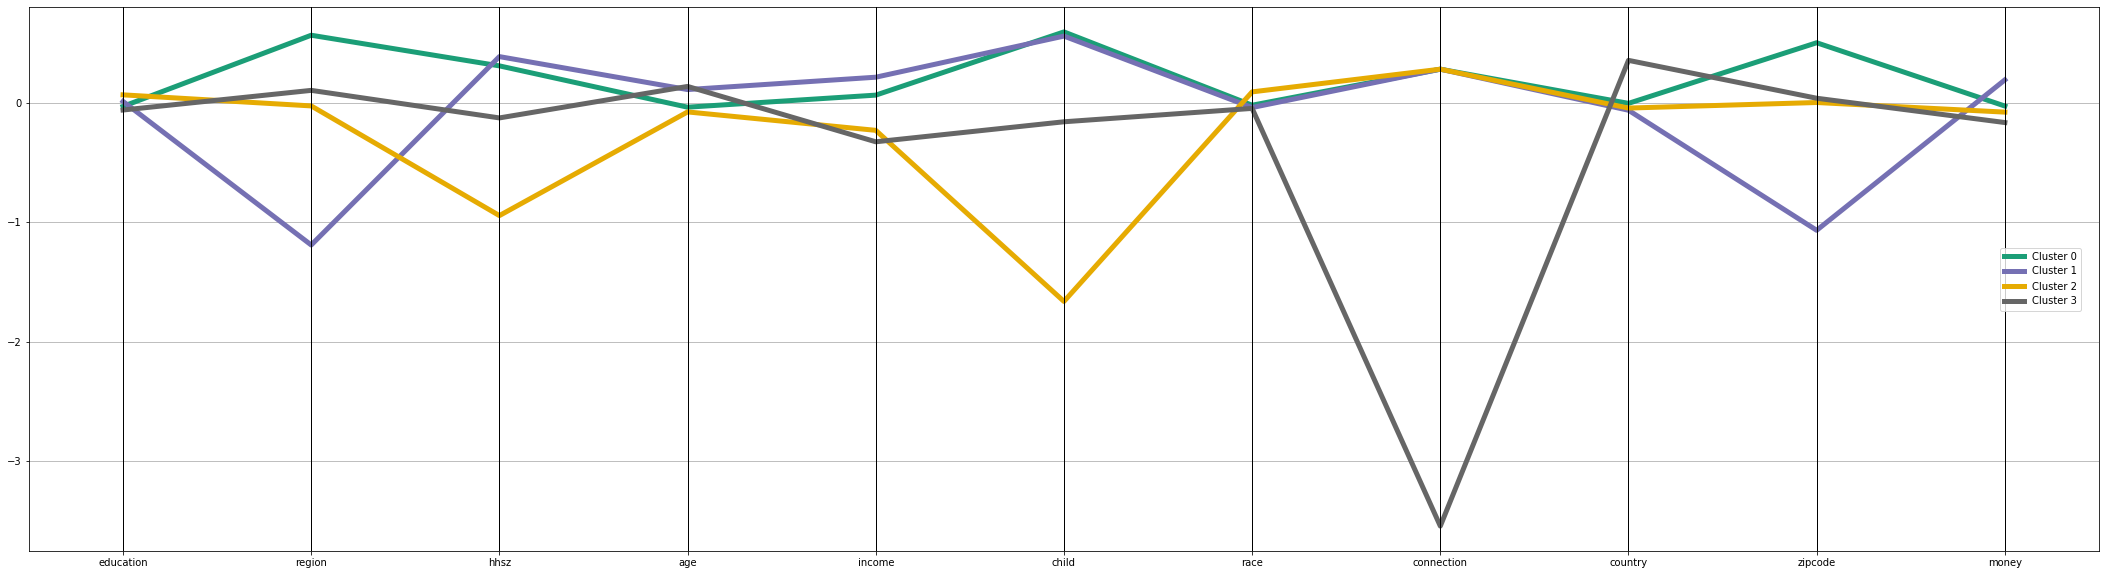

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=shopping_df_drop_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,10.5)

In [ ]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(shopping_df_drop_norm)
# find closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2
# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_},
    index=shopping_df_drop_norm.index)
# group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (1022 members): 7433.72 within cluster 
Cluster 1 (489 members): 4079.13 within cluster 
Cluster 2 (514 members): 4334.99 within cluster 
Cluster 3 (161 members): 1453.15 within cluster 


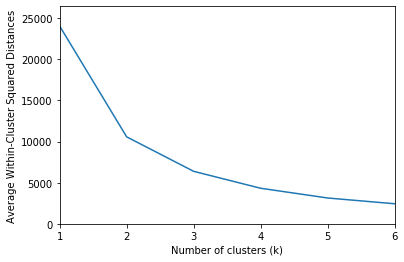

In [ ]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(shopping_df_drop_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(shopping_df_drop_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=shopping_df_drop_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(map(str,(item.index))))

0 :  14840503, 12890751, 13129562, 12910664, 15537454, 13020319, 14586021, 15653569, 15318418, 13971801, 15480135, 14423054, 14705577, 14602489, 12930062, 13421681, 15420133, 13015024, 15484146, 13634033, 13043251, 14850945, 15330930, 14256375, 15531786, 11561629, 14894229, 14018190, 14598179, 15676291, 14032241, 13713997, 15563586, 14413179, 10760612, 14947938, 12484409, 14264581, 15462314, 13601421, 15371832, 15427838, 14574677, 15496226, 13963009, 14607445, 13999721, 14540929, 15476910, 13703187, 15377387, 15202147, 15490209, 14612158, 13646576, 13369976, 14536358, 15396901, 13751062, 15284863, 12733964, 15410726, 15197354, 14814447, 11483061, 14147561, 15467014, 14831712, 14878029, 14224159, 15554692, 13573961, 12831334, 14170741, 14583386, 12478626, 13012907, 14386209, 15489395, 14541953, 14599515, 15012761, 12514957, 13018224, 14787844, 15211683, 15653081, 10751199, 15220711, 14649227, 15359933, 15395926, 13169430, 13055226, 14027091, 14473709, 12019330, 14516025, 12691373, 13655

   education  region   hhsz    age  income  child   race  connection  \
0     -0.026   0.007  0.326  0.017   0.089  0.600 -0.026       0.027   
1      0.073  -0.019 -0.903 -0.047  -0.246 -1.664  0.072      -0.075   

     country  zipcode  money  
0  6.242e-04   -0.001  0.029  
1 -1.733e-03    0.004 -0.082  


(-0.5, 7.5)

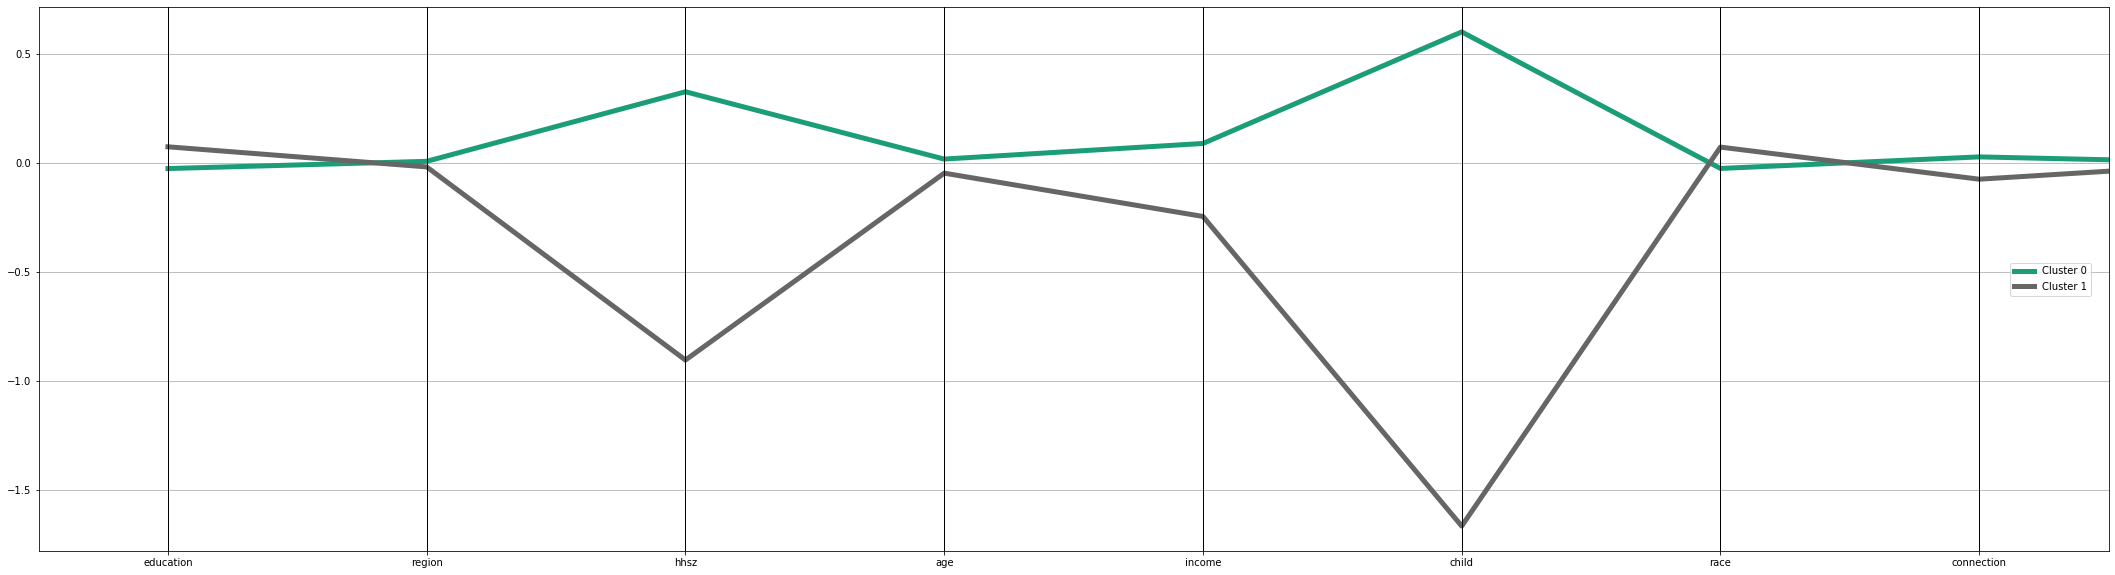

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=shopping_df_drop_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(shopping_df_drop_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=shopping_df_drop_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(map(str,(item.index))))

0 :  14840503, 12910664, 15537454, 13020319, 15653569, 14423054, 14705577, 14602489, 13015024, 15484146, 13634033, 13043251, 14850945, 14256375, 11561629, 14894229, 14598179, 14574677, 14607445, 13999721, 14540929, 15476910, 15377387, 15202147, 15490209, 14612158, 13646576, 15396901, 13751062, 15284863, 12733964, 15410726, 15197354, 14814447, 11483061, 14147561, 15467014, 14831712, 14224159, 15554692, 13573961, 12831334, 14170741, 12478626, 15489395, 14541953, 12514957, 14787844, 15653081, 15220711, 15359933, 13055226, 14473709, 14516025, 12691373, 13655356, 12639378, 14879496, 15282727, 14423605, 10430323, 14577841, 12991239, 14590199, 13771032, 14536954, 12501531, 15697102, 13487491, 14233829, 10298714, 14235954, 14563710, 13499074, 15563518, 14865279, 14564067, 15457193, 14108431, 12826348, 15007446, 10772529, 14549115, 14557073, 13419784, 14541120, 15691688, 12906917, 14860016, 15679235, 15386038, 12825690, 13769547, 12496551, 14150580, 13496495, 15475316, 12961753, 14703363, 14475

   education  region   hhsz    age  income  child   race  connection  country  \
0      0.584   0.588  0.274 -0.068   0.140  0.592 -0.149       0.282   -0.063   
1      0.578  -1.172  0.333  0.119   0.278  0.545 -0.149       0.282   -0.072   
2      0.090  -0.013 -0.954 -0.065  -0.237 -1.664 -0.149       0.282   -0.063   
3     -1.713  -0.026  0.470  0.052  -0.041  0.577 -0.149       0.282    0.109   
4     -0.062   0.108 -0.135  0.144  -0.315 -0.164 -0.149      -3.546    0.375   
5     -0.347   0.003 -0.200 -0.078  -0.391 -0.167  5.381       0.022    0.056   

   zipcode  money  
0    0.494 -0.063  
1   -1.053  0.301  
2    0.016 -0.078  
3    0.023 -0.028  
4    0.048 -0.171  
5    0.017  0.198  


(-0.5, 7.5)

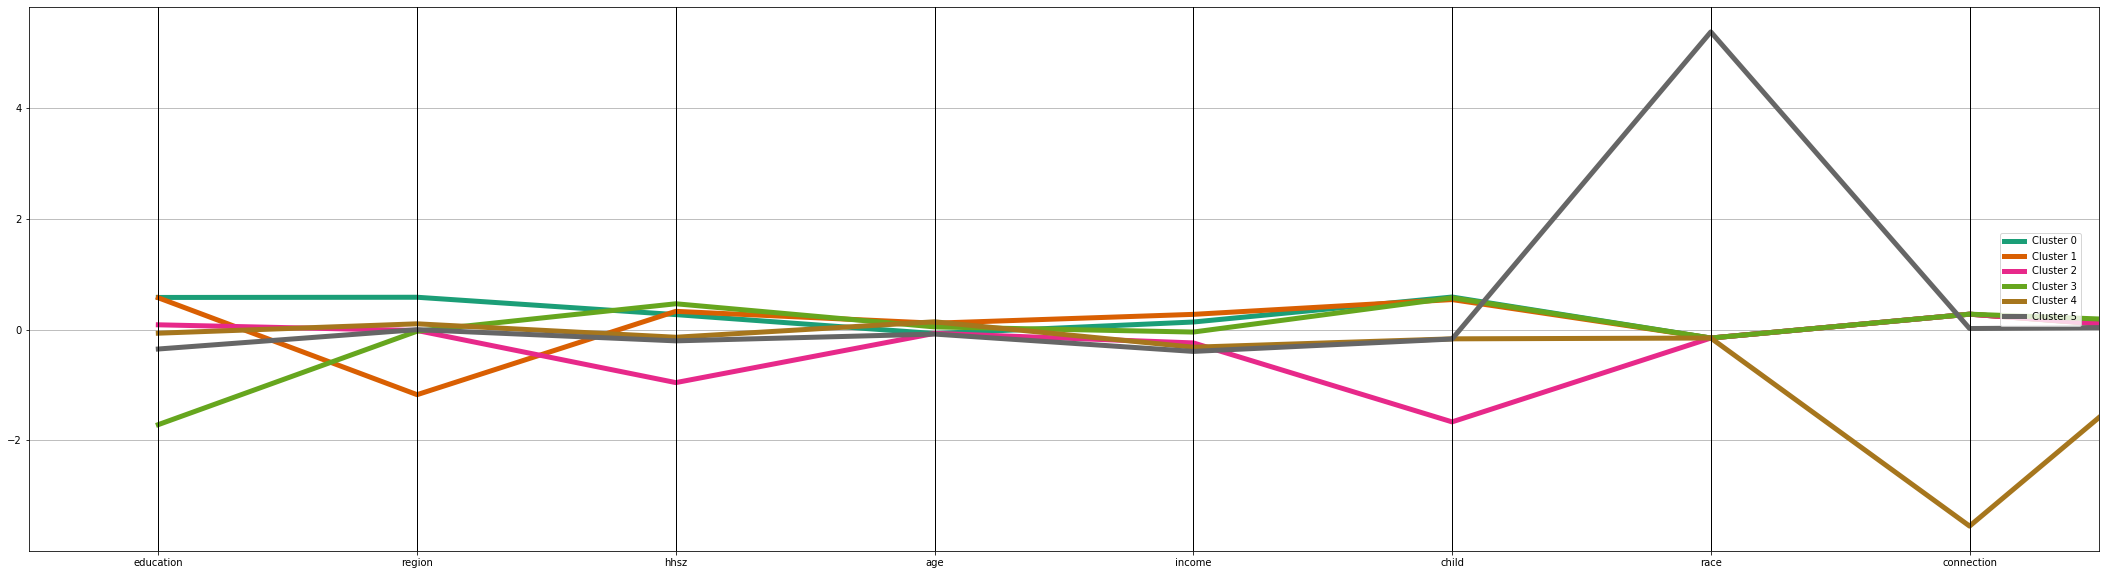

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=shopping_df_drop_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(shopping_df_drop_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=shopping_df_drop_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(map(str,(item.index))))

0 :  14840503, 13971801, 14423054, 14947938, 14607445, 15490209, 14612158, 15410726, 14814447, 11483061, 14224159, 12831334, 14787844, 15395926, 12691373, 12633515, 14423605, 12501531, 14235954, 13499074, 15563518, 14564067, 14108431, 15007446, 10772529, 14549115, 15691688, 14982997, 15386038, 15475316, 12961753, 12906553, 13799270, 13046328, 15107050, 15602340, 12915767, 14355944, 14204933, 12449356, 14788695, 14634366, 14990657, 14615699, 14369354, 11615824, 13901079, 13518479, 15575863, 12848937, 13110486, 13163500, 14642138, 15068690, 15298678, 14599724, 14364116, 14356555, 13735703, 15198286, 13138962, 10749851, 14561163, 12939082, 14571886, 15362338, 12992483, 15021398, 12930080, 15204691, 14579316, 11609921, 13945892, 14998319, 13008850, 14599398, 13168888, 11451146, 14640091, 15065344, 15497445, 14496240, 13026088, 13175288, 13640887, 14427294, 13061914, 15329132, 14653710, 13112754, 13912633, 13405454, 15263690, 13126537, 13648896, 13542032, 13599242, 14665296, 10524015, 14593

   education  region   hhsz    age     income  child   race  connection  \
0      0.176   1.367  0.295 -0.125  1.917e-03  0.591 -0.149       0.282   
1      0.137   0.254  0.107  0.063 -3.570e-02  0.380  0.052       0.282   
2      0.584  -1.201  0.312  0.054  2.873e-01  0.601 -0.149       0.282   
3      0.139   0.539 -0.915 -0.107 -2.882e-01 -1.664 -0.149       0.282   
4     -0.380  -0.005 -0.228 -0.104 -3.911e-01 -0.194  5.430       0.013   
5     -1.712  -0.349  0.467  0.076 -3.337e-02  0.567 -0.149       0.282   
6      0.584   0.258  0.290 -0.027  2.199e-01  0.596 -0.149       0.282   
7     -0.261   0.141  0.171 -0.081  8.627e-06  0.205 -0.149       0.282   
8     -0.062   0.108 -0.135  0.144 -3.149e-01 -0.164 -0.149      -3.546   
9      0.157  -1.201 -0.953  0.223 -1.089e-01 -1.650 -0.149       0.282   

   country  zipcode  money  
0   -0.393    1.530 -0.123  
1   -0.393    0.392  5.176  
2   -0.393   -1.078  0.053  
3   -0.373    0.537 -0.162  
4    0.071    0.026 -0.075  


(-0.5, 7.5)

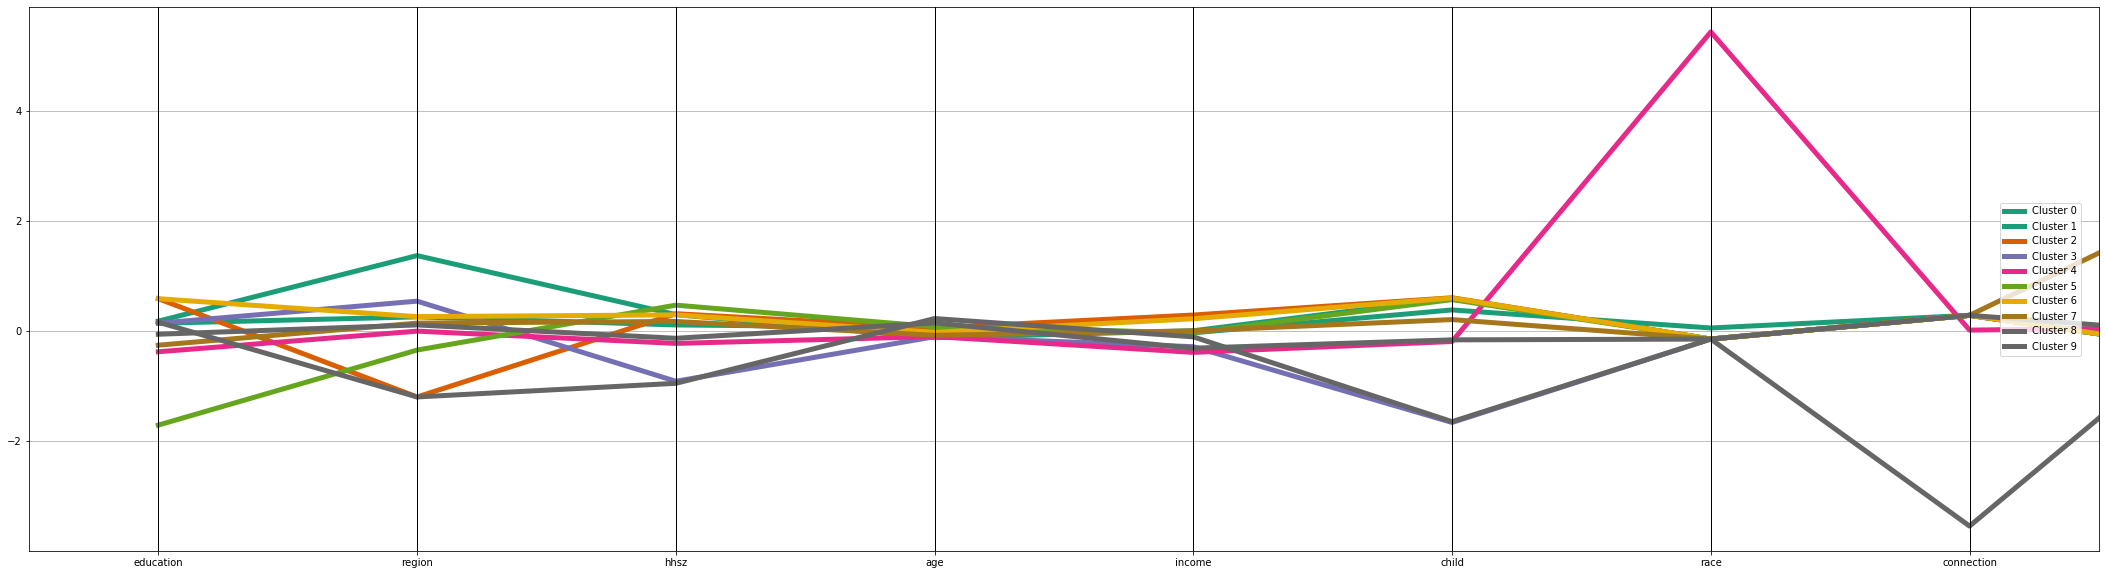

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=shopping_df_drop_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)